# MACHINE LEARNING: AIRBNB ANALYSIS



## PROJECT

UoEO Machine Learning

Assignment Due Date: 2 December, 2024

### TEAM 2 AUTHORS
* Ahmed Husain
* Dinh (Danty) Khoi
* Maria Ingold
* Murthy Kanuri



### PROJECT DESCRIPTION

#### Development Team Project

Determine interesting business analytic substantive question answered by dataset that is useful for the Airbnb executive board.

#### Business Analytic Question

Agreed by: Ahmed, Danty, Maria, Murthy

How can Airbnb NYC optimise revenues by providing tailored pricing recommendations based on understanding the influence of location, room type and host characteristics on price?

#### Source Dataset: Airbnb NYC 2019

[![Open In Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)    

#### Code

[![Open In GitHub](https://img.shields.io/badge/Open%20In-GitHub-lightgrey?logo=github)](https://github.com/mariaingold/AirbnbNYC/blob/main/AirbnbNYC.ipynb)  

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mariaingold/AirbnbNYC/blob/main/AirbnbNYC.ipynb)

### CONTRIBUTIONS


| ACTION         | WHO       | DESCRIPTION                     |
|----------------|-----------|---------------------------------|
| Setup          | Maria     | Google Colab, GitHub (connection, collaboration, Readme), structure, initial setup, basic data exploration. |
| EDA            | Danty     | Exploratory Data Analysis (EDA) (primary - most detail including comments) |
|                | Ahmed     | Exploratory Data Analysis (detail including clustering) |
|                | Maria     | Basic EDA as part of setup, comment detail, outlier boxplots, added neighbourhood, added elbow method |
|
| Review         | Ahmed     | EDA, ... |
|                | Danty     | EDA, ... |
|                | Maria     | Merged initial notebook with Danty's and Ahmed's EDA, removed duplications, consolidated variable names, fixed warnings, added structure and additional comments. |
|                | Murty     | EDA, ... |
| Analysis       | Ahmed     | EDA, ...    |
|                | Danty     | EDA, ... |
|                | Maria     | Detailed comments to provide analysis of results. Further research into outliers especially for pricing. |
|                | Murty     | TBC...   |


## SETUP

### Import Libraries

In [59]:
import pandas as pd                  # data manipulation
import numpy as np                   # numerical computation / inear algebra
from matplotlib import pyplot as plt # plots, charts and figures
import seaborn as sns                # enhanced visuals and statistics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

### Import Data

***Manually upload AB_NYC_2019.csv into Session Storage in Google Colab***

### Read Data

In [3]:
nyc_airbnb_df = pd.read_csv("AB_NYC_2019.csv")

## EXPLORATORY DATA ANALYSIS

### Overview

#### Column overview

The NYC Airbnb dataset has 48,895 entries and 16 columns. Key columns include:
- Host Information: host_id and host_name.
- Location Information: neighbourhood_group, neighbourhood, latitude, longitude.
- Listing Characteristics: room_type, price, minimum_nights, number_of_reviews, last_review, and reviews_per_month.
- Listing Metrics: calculated_host_listings_count (number of listings by the host) and availability_365 (days available per year).

Some columns, such as name, host_name, and last_review, contain missing values. Specifically:
- name and host_name have a few missing entries.
- last_review and reviews_per_month have more substantial missing values, likely due to properties with no reviews.



#### EDA Plan for This Dataset

1. Summary Statistics: Structure and contents: columns, rows, column names and types
2. Data Cleaning: Identify and handle missing values.
3. Descriptive Anaysis: Descriptive statistical analysis like skew and kurtosis for numeric features.
4. Univariate Analysis: Examine distributions for numerical columns (e.g., price, minimum_nights).
5. Bivariate Analysis: Examine two variables.
6. Multivariate Analysis:

#### Steps to Address Question

How can Airbnb NYC optimise revenues by providing tailored pricing recommendations based on understanding the influence of location, room type and host characteristics on price?

1. Analyze Price Distribution: Examine price to identify outliers and distribution shape.
2. Price by Neighbourhood Group: Analyze how prices vary by neighbourhood_group.
3. Price by Room Type: Examine price trends across different room types.
4. Price vs Host Characteristics:
- Calculated Host Listings Count: Investigate if hosts with multiple listings set different price levels.
5. Interactions:
- Neighbourhood Group & Room Type: Analyze combined influence on prices.
6. Regression Analysis: Conduct an initial regression to see how well these features explain price variability.

### SUMMARY STATISTICS

Get a sense of the data structure and contents by summarising the data.

#### Number of columns and rows

In [4]:
print("Number of columns: ", len(nyc_airbnb_df.columns))
print("Number of rows: ", len(nyc_airbnb_df))

Number of columns:  16
Number of rows:  48895


#### Column names, non-nulls and types

In [5]:
nyc_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### 5-Figure Summary per Column

- Mean (mean)
- Standard Deviation (std)
- Minimum and Maximum (min, max)
- Median (50%)
- Quartile 1 (25%)
- Quartile 3 (75%)

In [6]:
nyc_airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


MARIA NOTE: ACTION: MIN - MAX gives RANGE. TBD

MARIA NOTE: ACTION: ADD MODE! TBD.

#### Review Data (head and tail)

Reviewing both head and tail shows a more complete picture.

##### Head

Head shows mostly complete data.

In [7]:
nyc_airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


##### Tail

Tail shows more NaN -- more missing data.

In [8]:
nyc_airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


### DATA CLEANING

#### Identify missing values

The dataset has missing values in the following columns:
- last_review: 10,052 missing entries
- reviews_per_month: 10,052 missing entries, likely corresponding to listings with no reviews.
- host_name: 21 missing entries
- name: 16 missing entries

In [9]:
# Identify missing values in the dataset
missing_values = nyc_airbnb_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

,0
last_review,10052
reviews_per_month,10052
host_name,21
name,16


#### Handle missing values

- last_review and reviews_per_month: Replace missing values with “No reviews” for last_review and 0 for reviews_per_month.
- host_name and name: Since these are non-essential for analysis, leave them as-is or remove rows if needed for specific tasks.

##### last_review and reviews_per_month


MARIA NOTE: Can't use inplace=True as that will be deprecated in Pandas 3.0, so code changed.

Old code:

nyc_airbnb_df['last_review'].fillna("No reviews", inplace=True)

nyc_airbnb_df['reviews_per_month'].fillna(0, inplace=True)

In [10]:
# Handle missing values as planned by modifying source dataset
nyc_airbnb_df.loc[nyc_airbnb_df['last_review'].isnull(), 'last_review'] = "No reviews"
nyc_airbnb_df.loc[nyc_airbnb_df['reviews_per_month'].isnull(), 'reviews_per_month'] = 0

# Verify missing values after handling
missing_values_after_cleaning = nyc_airbnb_df.isnull().sum()
missing_values_after_cleaning

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


##### host_name and name

After handling the missing values, only name and host_name still have a few missing entries. Since these columns are not critical for the EDA, we can proceed with the analysis without further modification.

#### Numeric Variables

In [27]:
# Selecting only numeric columns for analysis
numeric_columns_nyc = nyc_airbnb_df.select_dtypes(include=['float64', 'int64']).columns

### DESCRIPTIVE ANALYTICS

#### Skew and Kurtosis

Descriptive analysis on numerical columns to examine distributions and calculate skewness and kurtosis for each.

SKEWNESS
- Asymmetry of distribution of dataset.
- Positive skew: right skewed (long right tail)
- Negative skew: left skewed (long left tail)
- Zero skew: normal distribution

High Positive Skew (large outliers towards right)
- price
- minimum_nights
- number_of_reviews
- reviews_per_month
- calculated_host_listings_count

Positive Skew (some outliers towards right)
- host_id
- longitude

Slight Postive Skew (closer to normal, some outliers to right)
- latitude
- availability_365

Very Slightly Negative (almost normal)
- id

KURTOSIS
- Peakedness and tailedness of dataset distribution
- Postive kurtosis: peaked with more tails (outliers)
- Negative kurtosis: flatter and lighter tails (concentrated at mean)
- Zero kurosis: normal peakedness in distribution

Very High Postive Kurtosis (sharp peak, heavy tails --> outliers)
- price
- minimum_nights
- reviews_per_month
- calculated_host_listings_count

High Positive Kurtosis (sharp peak, heavey tails --> outliers)
- longitude

Slight Positive Kurtosis (closer to normal, but outliers)
- host_id
- latitude

Sighlty Negative Kurtosis
- id
- availability_365

These findings suggest the need for potential transformations or outlier handling in these variables.

In [28]:
# Calculation of skewness and kurtosis for numerical columns

# Calculate skewness and kurtosis
skew_kurtosis_nyc = nyc_airbnb_df[numeric_columns_nyc].agg(['skew', 'kurtosis']).transpose()

# Display skewness and kurtosis results
skew_kurtosis_nyc

,skew,kurtosis
id,-0.090257,-1.227748
host_id,1.206214,0.169106
latitude,0.237167,0.148845
longitude,1.284210,5.021646
price,19.118939,585.672879
minimum_nights,21.827275,854.071662
number_of_reviews,3.690635,19.529788
reviews_per_month,3.300723,43.531611
calculated_host_listings_count,7.933174,67.550888
availability_365,0.763408,-0.997534


### UNIVARIATE ANALYSIS

Oluleye (2023) for visualising one variable:
- summary table
- bar chart
- boxplot (good for finding outliers)
- histogram (good for finding outliers)
- pie chart
- violin plot


#### Categorical Analysis

##### Neighbourhood Group

The majority of listings are concentrated in Manhattan and Brooklyn, with fewer in Queens, the Bronx, and Staten Island.

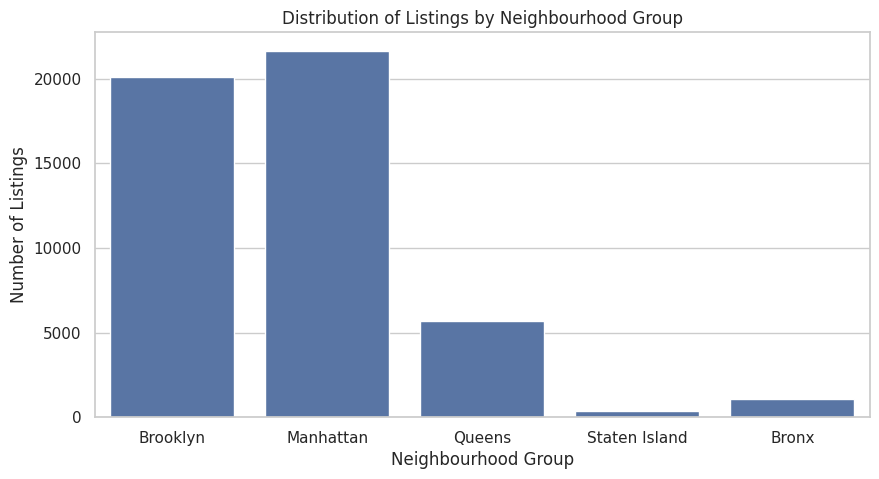

In [13]:
# Set a general style for the plots
sns.set(style="whitegrid")

# Plotting the distribution of listings by neighbourhood group
plt.figure(figsize=(10, 5))
sns.countplot(x='neighbourhood_group', data=nyc_airbnb_df)
plt.title("Distribution of Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.show()

##### Unique Neighbourhoods in Neighbourhood Groups

Unique Neighborhoods per Neighborhood Group:
 neighbourhood_group
Bronx            48
Brooklyn         47
Manhattan        32
Queens           51
Staten Island    43
Name: neighbourhood, dtype: int64


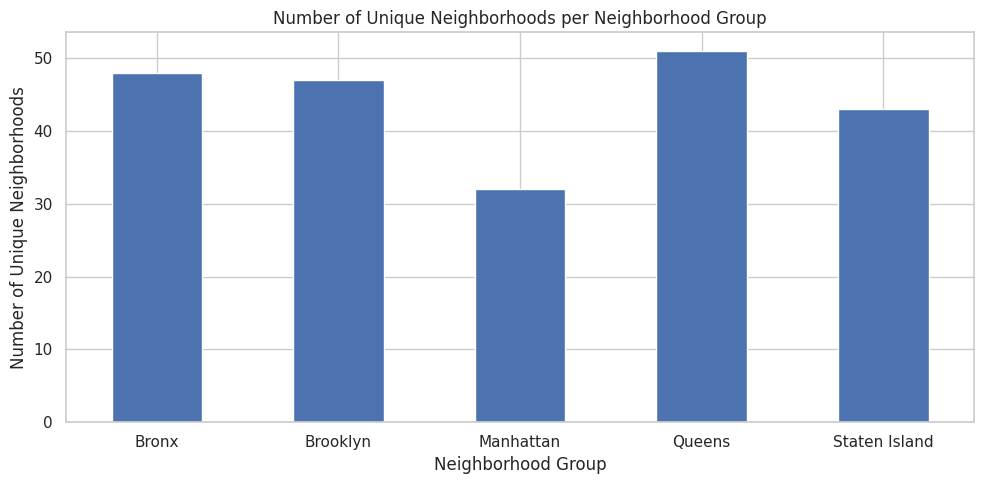

In [35]:
# Group by neighborhood_group and get unique neighborhoods
neighborhood_counts = nyc_airbnb_df.groupby('neighbourhood_group')['neighbourhood'].nunique()

# Print the results
print("Unique Neighborhoods per Neighborhood Group:\n", neighborhood_counts)

# Visualization using a bar chart
plt.figure(figsize=(10, 5))
neighborhood_counts.plot(kind='bar')
plt.title('Number of Unique Neighborhoods per Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Unique Neighborhoods')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()

##### Room Type

Most listings are for “Entire home/apt,” followed by “Private room,” with fewer listings for “Shared room.”

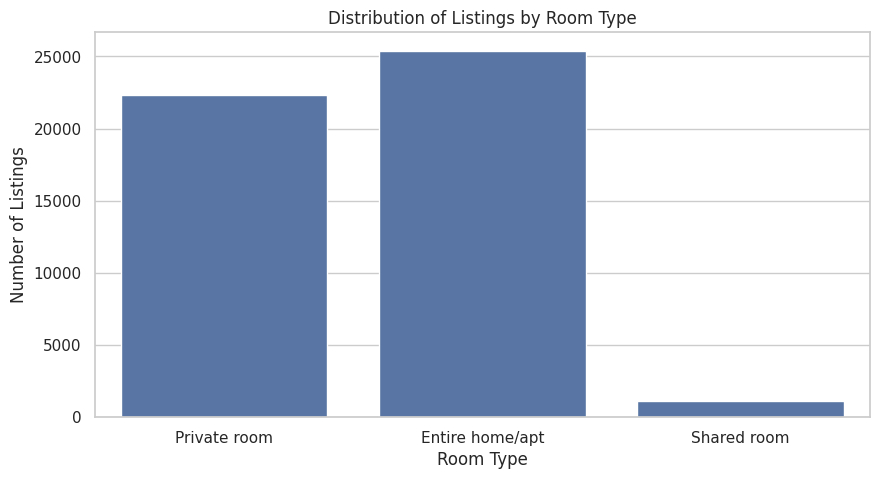

In [14]:
# Plotting the distribution of listings by room type
plt.figure(figsize=(10, 5))
sns.countplot(x='room_type', data=nyc_airbnb_df)
plt.title("Distribution of Listings by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.show()

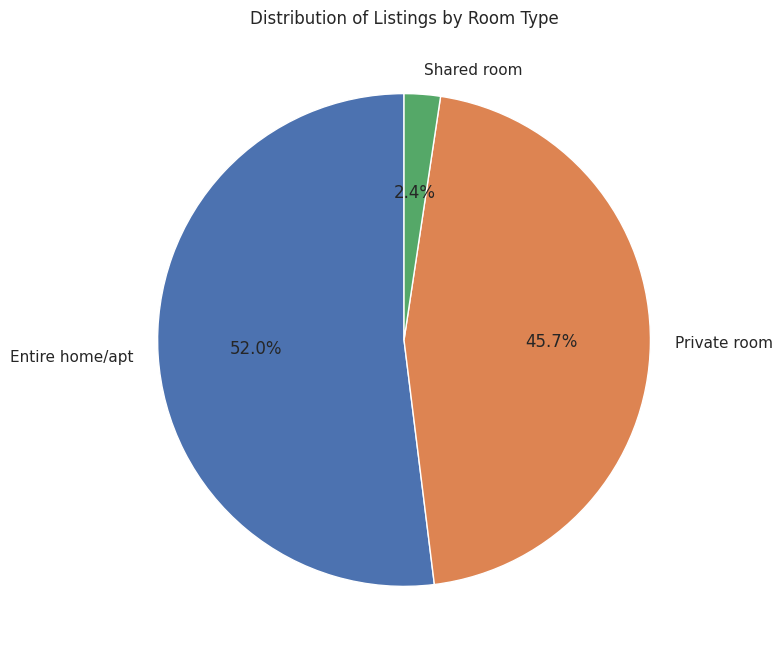

In [52]:
# Calculate the counts for each room type
room_type_counts = nyc_airbnb_df['room_type'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Listings by Room Type")
plt.show()

#### Numerical Analysis

##### Host Listing Type

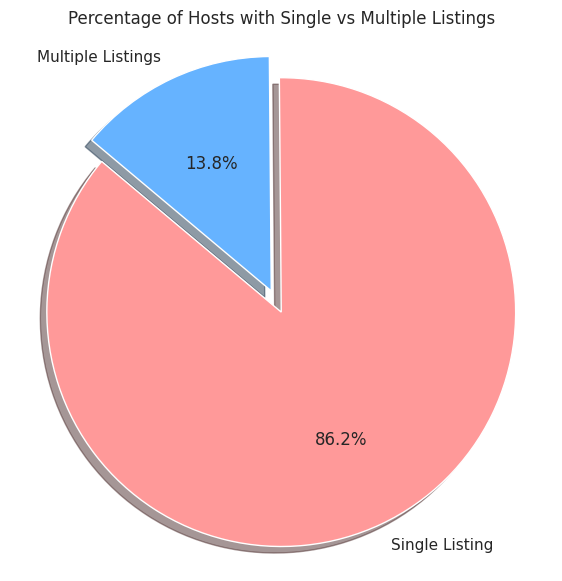

In [55]:
# Group by 'host_id' and count the number of listings for each host
host_listings_count = nyc_airbnb_df.groupby('host_id')['id'].count()

# Create a new column to classify hosts as having a single listing or multiple listings
single_listing = host_listings_count[host_listings_count == 1]
multiple_listings = host_listings_count[host_listings_count > 1]

# Calculate percentages
single_listing_percentage = (len(single_listing) / len(host_listings_count)) * 100
multiple_listings_percentage = (len(multiple_listings) / len(host_listings_count)) * 100

# Pie chart
labels = ['Single Listing', 'Multiple Listings']
sizes = [single_listing_percentage, multiple_listings_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice (Single Listing)

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Hosts with Single vs Multiple Listings')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

Review the high skew outliers (numeric).

- price
- minimum_nights
- number_of_reviews
- reviews_per_month
- calculated_host_listings_count

##### Price (STEP 1)

###### Statisical Descriptive Analysis on Price

In [15]:
# Mean price
print(f"Mean price: ${nyc_airbnb_df['price'].mean():.2f}")

# Median price
print(f"Median price: ${nyc_airbnb_df['price'].median():.2f}")

# Price range
print(f"Price range: ${nyc_airbnb_df['price'].min()} to ${nyc_airbnb_df['price'].max()}")

# Calculate quartiles
Q1 = nyc_airbnb_df['price'].quantile(0.25)
print(f"First Quartile (Q1) of price: ${Q1:.2f}")

Q3 = nyc_airbnb_df['price'].quantile(0.75)
print(f"Third Quartile (Q3) of price: ${Q3:.2f}")

# Calculate IQR
IQR = Q3 - Q1
print(f"Interquartile Range (IQR) of price: ${IQR:.2f}")

# Calculate outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower bound of price ouliers: ${lower_bound:.2f}")
print(f"Upper bound of price outliers: ${upper_bound:.2f}")

# Number of outliers
outlier_below = nyc_airbnb_df[nyc_airbnb_df['price'] < (Q1 - 1.5 * IQR)]
outlier_above = nyc_airbnb_df[nyc_airbnb_df['price'] > (Q3 + 1.5 * IQR)]
print(f"Number of outliers below the IQR: {len(outlier_below)}")
print(f"Number of outliers above the IQR: {len(outlier_above)}")

# Total number of non-null price rows
non_null_price_count = nyc_airbnb_df['price'].notnull().sum()
print("Out of total number of non-null price rows:", non_null_price_count)


Mean price: $152.72
Median price: $106.00
Price range: $0 to $10000
First Quartile (Q1) of price: $69.00
Third Quartile (Q3) of price: $175.00
Interquartile Range (IQR) of price: $106.00
Lower bound of price ouliers: $-90.00
Upper bound of price outliers: $334.00
Number of outliers below the IQR: 0
Number of outliers above the IQR: 2972
Out of total number of non-null price rows: 48895


###### Price Box Plot

High priced listings could be luxury properties or in prime locations. Removing them will impact revenue. But they also skew average prices, making it harder to price new listings.

ACTION: Better understand what generates a higher price in bivariate. Is it a location, for instance?

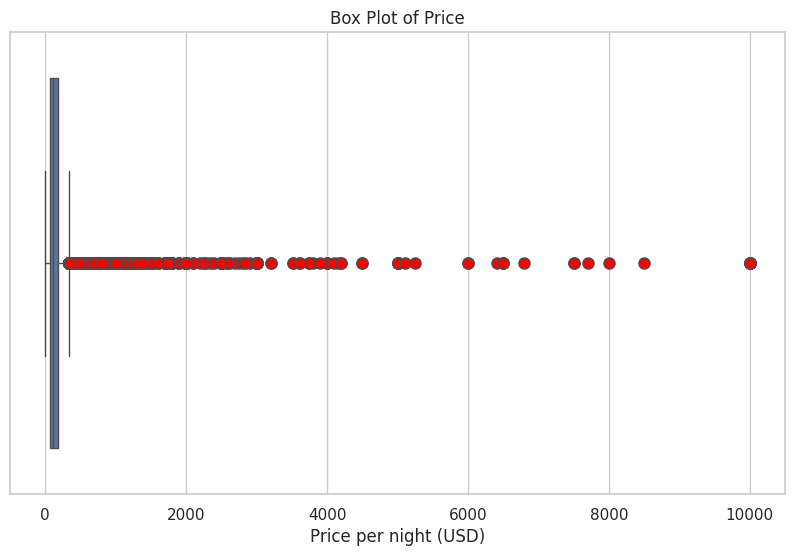

In [16]:
# Create the box plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x='price', data=nyc_airbnb_df,  # Use x='price' for horizontal orientation
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8}) # Customize outlier markers
plt.title('Box Plot of Price')
plt.xlabel('Price per night (USD)')  # Change ylabel to xlabel
plt.show()

###### Price Distribution (Zoomed in to 0-1000 USD)

As seen in the calculations above, 334 USD is the upper bound above which there are 2,972 price outliers out of 48,895 non-null prices.

The zoomed in histogram shows that most listings are indeed priced below 400 USD, with a high concentration at lower prices.

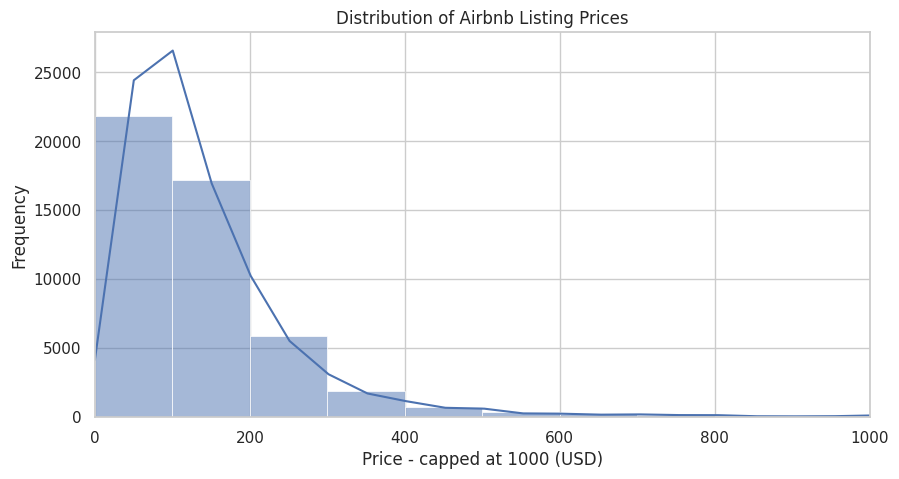

In [17]:
# Plot the distribution of 'price' with a histogram capped at 1000 USD
plt.figure(figsize=(10, 5))
sns.histplot(nyc_airbnb_df['price'], bins=100, kde=True)
plt.xlim(0, 1000)  # Limit x-axis for a clearer view (removes extreme outliers)
plt.title("Distribution of Airbnb Listing Prices")
plt.xlabel("Price - capped at 1000 (USD)")
plt.ylabel("Frequency")
plt.show()

##### Minimum nights box plot

Very high minimum nights could be targeting specific customer segments like long-term rental.

ACTION: May want to split this into rental periods.

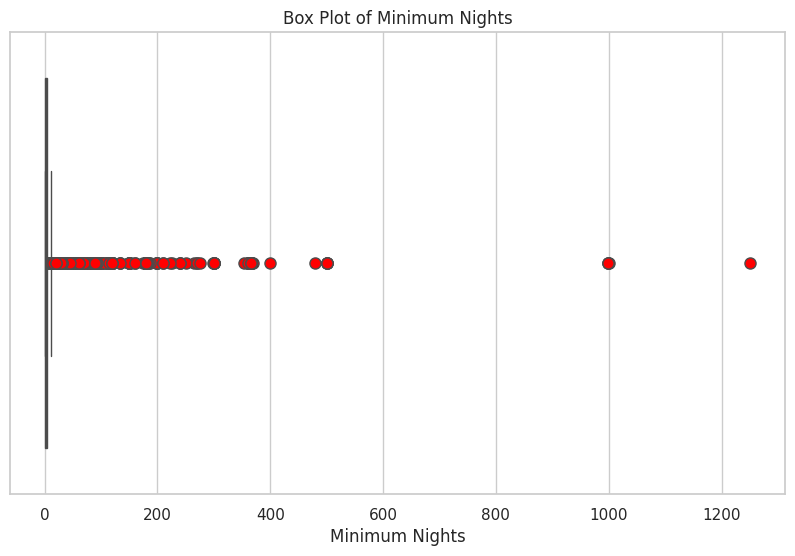

In [18]:
# Create the box plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x='minimum_nights', data=nyc_airbnb_df,  # Use x='price' for horizontal orientation
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8}) # Customize outlier markers
plt.title('Box Plot of Minimum Nights')
plt.xlabel('Minimum Nights')  # Change ylabel to xlabel
plt.show()

##### Number of Reviews

High number of reviews could mean popular listings or professional hosts (number listings) or rental for fewer days (minimum nights).

ACTION: Could compare to number of listings (i.e. professional hosts?), or see if more reviews have higher or lower prices, or see if it's just related to minimum nights (more frequently rented perhaps).

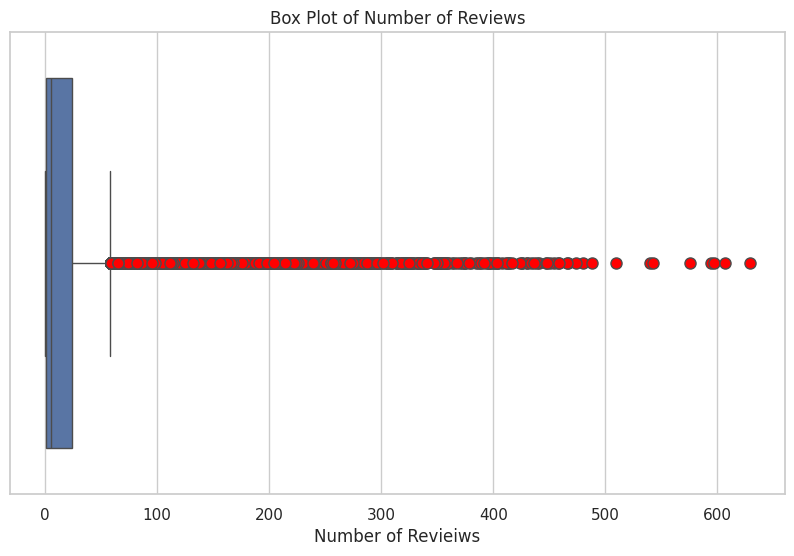

In [19]:
# Create the box plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x='number_of_reviews', data=nyc_airbnb_df,  # Use x='price' for horizontal orientation
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8}) # Customize outlier markers
plt.title('Box Plot of Number of Reviews')
plt.xlabel('Number of Revieiws')  # Change ylabel to xlabel
plt.show()

##### Reviews per month

High number of reviews per month could mean popular listings or professional hosts (number listings) or rental for fewer days (minimum nights).

ACTION: Could compare to number of listings (i.e. professional hosts?), or see if more reviews have higher or lower prices, or see if it's just related to minimum nights (more frequently rented perhaps).

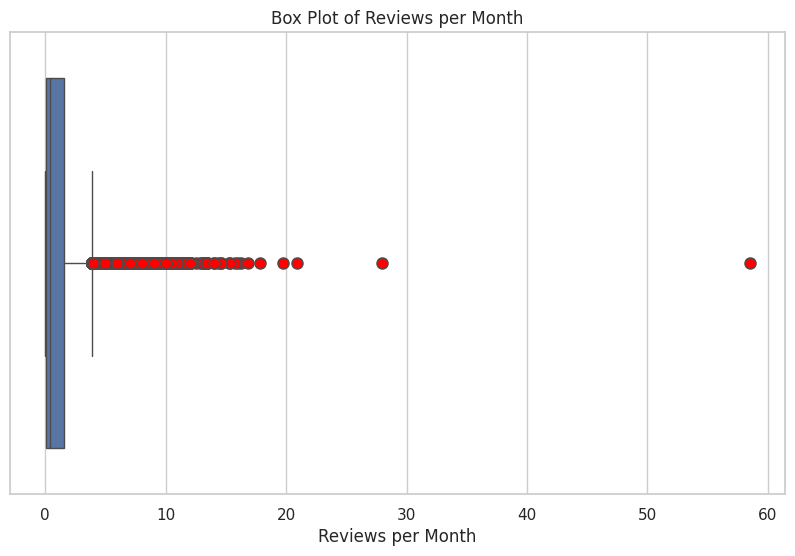

In [20]:
# Create the box plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x='reviews_per_month', data=nyc_airbnb_df,  # Use x='price' for horizontal orientation
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8}) # Customize outlier markers
plt.title('Box Plot of Reviews per Month')
plt.xlabel('Reviews per Month')  # Change ylabel to xlabel
plt.show()

##### Calculated Host Listings Count

High number of listings probably means professional hosts with multiple properties.

ACTION: Could get a better idea of how many in each group to see how many professional hosts.

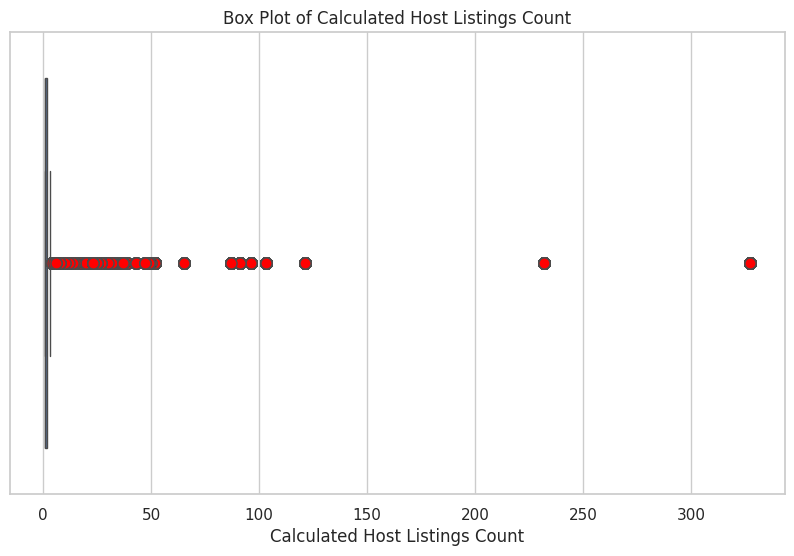

In [21]:
# Create the box plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x='calculated_host_listings_count', data=nyc_airbnb_df,  # Use x='calculated_host_listings_count' for horizontal orientation
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8}) # Customize outlier markers
plt.title('Box Plot of Calculated Host Listings Count')
plt.xlabel('Calculated Host Listings Count')  # Change ylabel to xlabel
plt.show()

### BIVARIATE ANALYSIS

Oluleye (2023) for analysing two variables:
- crosstab / two-way tables
- pivot table
- scatter plot
- bar chart
- correlation analysis
- pairplots
- boxplots
- histograms

#### Corrlation Heatmap

A correlation heatmap for the numeric columns helps understand their relationships better.

- +1: Perfect positive corrlation
- +0.5 to +1: Strong positive correlation
- 0 to +0.5: Weak positive correlation
- 0: No correlation
- -0.5 to 0: Weak negative correlation
- -1 to -0.5: Weak negative correlation
= -1: Perfect negative correlation

MARIA NOTE: CONFIRM THAT THESE MAKE SENSE.
- Could ID and number of reviews be how long someone has been a host?
- ID and host_id are related positively, so there seems to be a relationship in ID creation.
- Number of reviews and reviews per month are positively related that makes snese.


The correlation heatmap indicates the following relationships:

- Latitude and Longitude: As expected, they are not correlated with other variables in a meaningful way.
- Calculated Host Listings Count and Availability: Low correlation, suggesting that hosts's availability does not strongly correlate with their number of listings.
- Price and Minimum Nights: Surprisingly, there is no strong correlation between price and minimum_nights, which may be further investigated for insights.

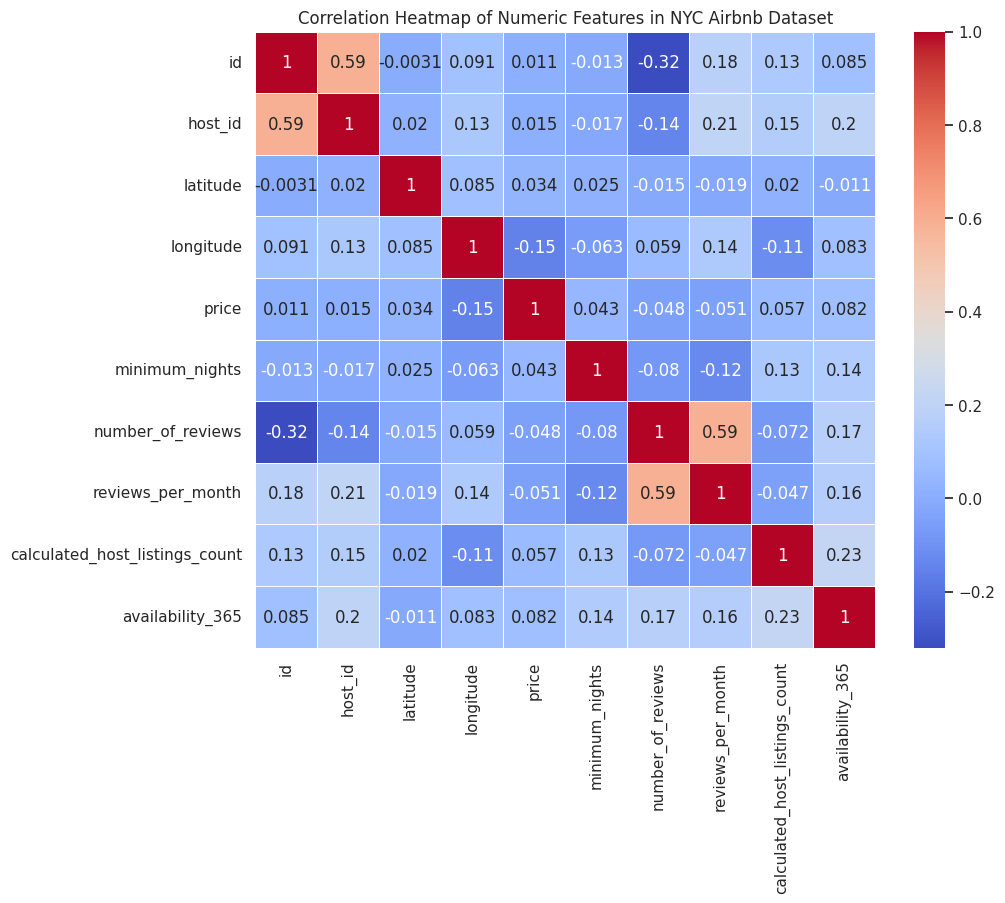

In [29]:
# Calculate correlation matrix
correlation_matrix_nyc = nyc_airbnb_df[numeric_columns_nyc].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_nyc, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features in NYC Airbnb Dataset")
plt.show()

#### Price by Location (STEP 2)

##### Neighbourhood Group Versus Price (Zoomed Out)

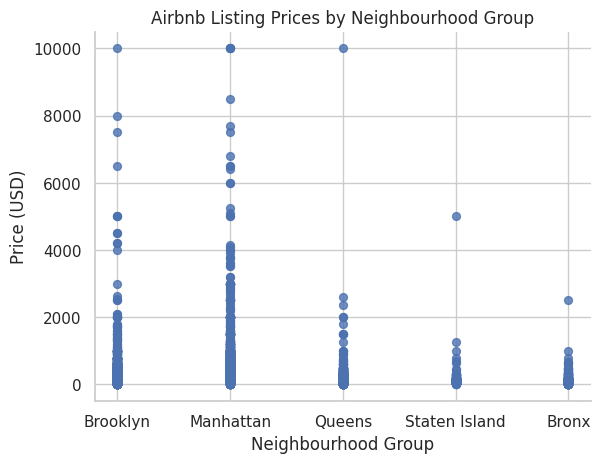

In [33]:
nyc_airbnb_df.plot(kind='scatter', x='neighbourhood_group', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Airbnb Listing Prices by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price (USD)")
plt.show()

##### Airbnb Listing Prices by Neighbourhood Group - Zoomed In

Examine how prices vary across different neighbourhood groups to see if location significantly influences price.

The boxplot indicates the following trends:

- Manhattan listings generally have the highest median prices, with more variability and outliers at the high end.
- Brooklyn follows Manhattan with moderately high prices.
Queens, the Bronx, and Staten Island have lower median prices, with fewer outliers.
- This suggests that location (specifically, neighborhood) influences number of listings and prices.

##### Price by Neighbourhood Group (Zoomed in 0-1000 USD)

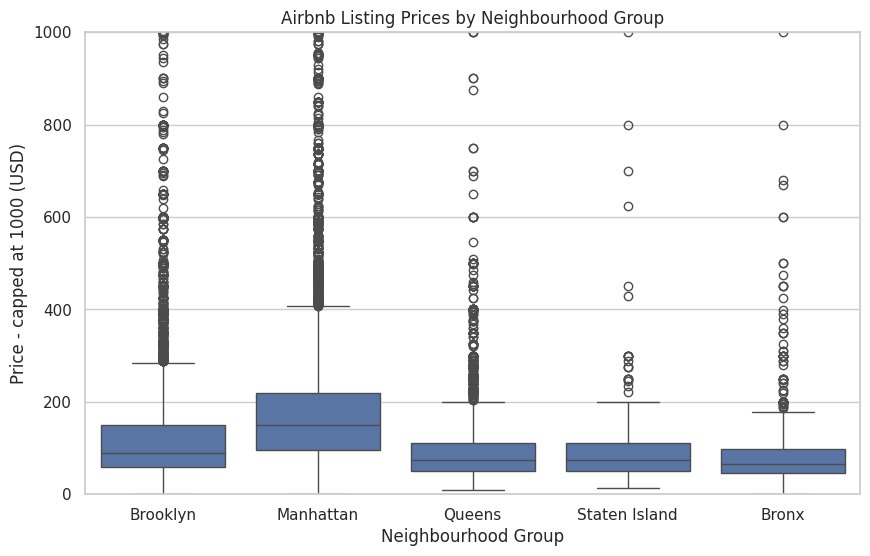

In [48]:
# Boxplot to show price distribution by neighbourhood group
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=nyc_airbnb_df)
plt.ylim(0, 1000)  # Limit y-axis for a clearer view (removes extreme outliers)
plt.title("Airbnb Listing Prices by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price - capped at 1000 (USD)")
plt.show()

#### Median Price by Neighbourhood by Neighbourhood Group

Median rather than mean as less succeptivle to outliers.

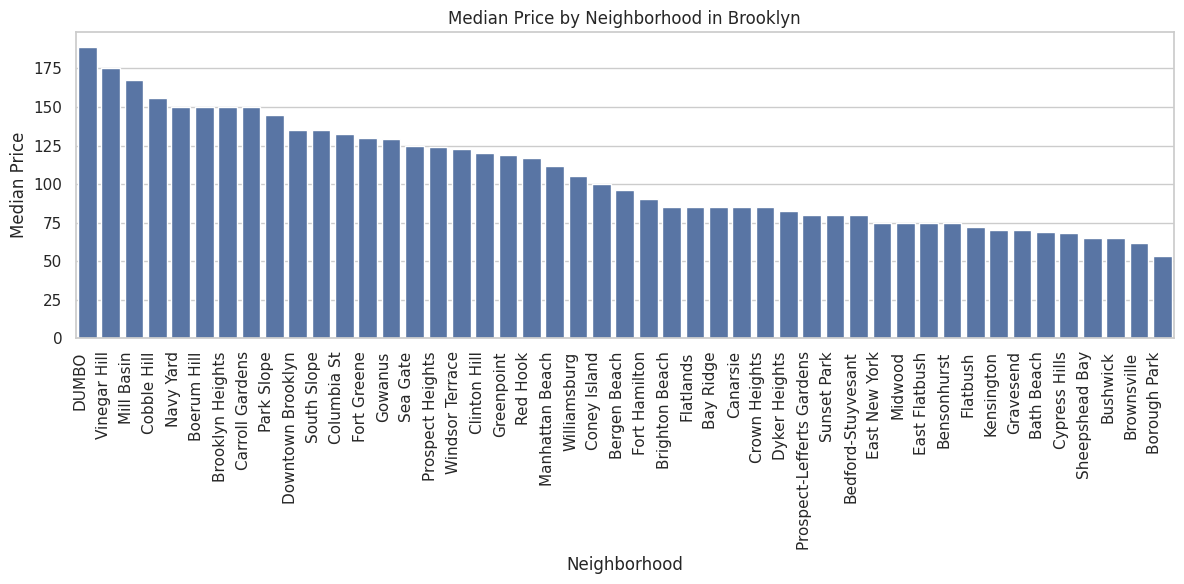

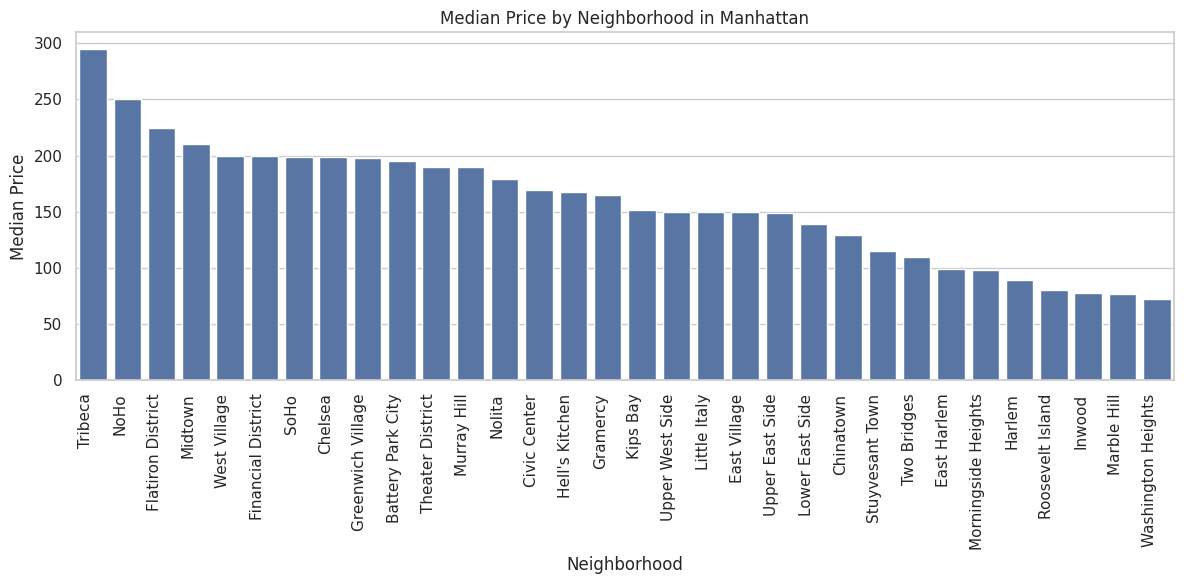

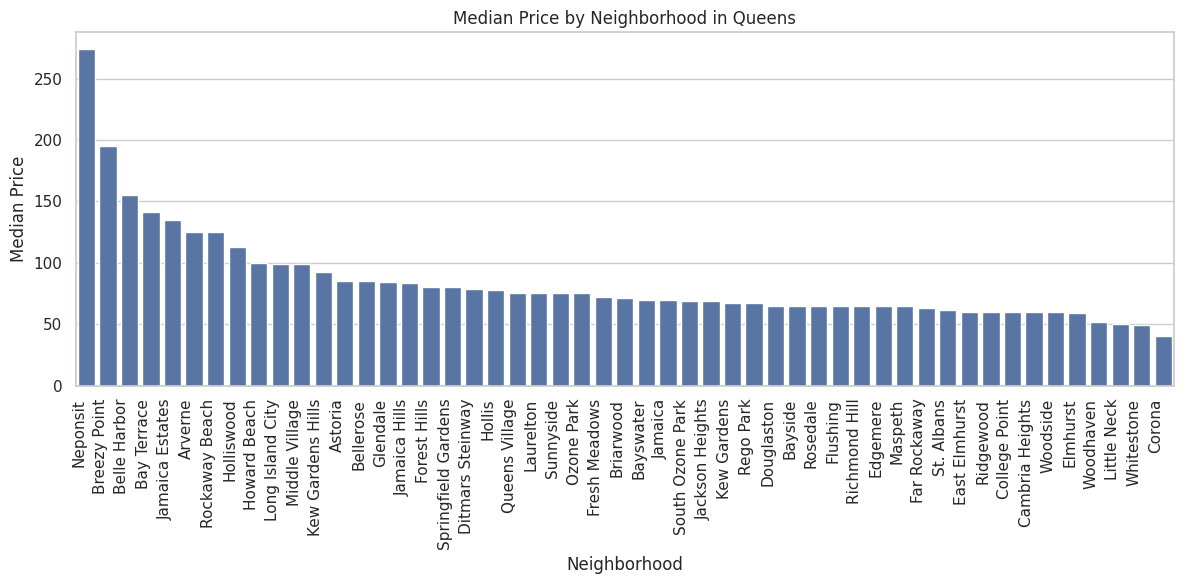

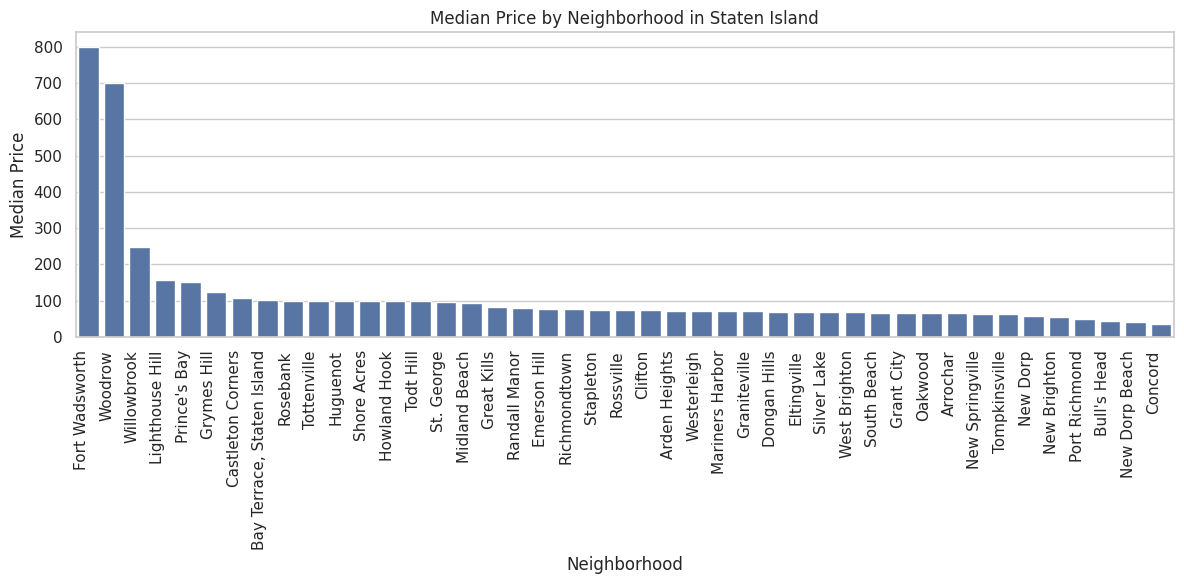

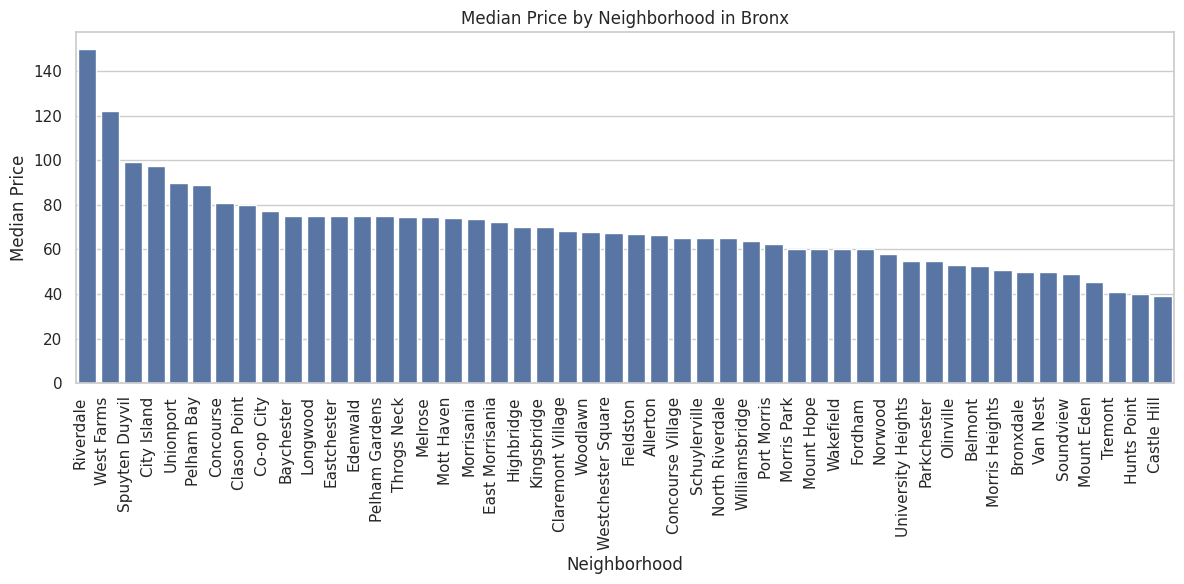

In [54]:
# Get unique neighborhood groups
neighborhood_groups = nyc_airbnb_df['neighbourhood_group'].unique()

# Loop through neighborhood groups and create plots
for group in neighborhood_groups:
    # Filter data for the current group
    group_data = nyc_airbnb_df[nyc_airbnb_df['neighbourhood_group'] == group]

    # Calculate average price per neighborhood within the group
    median_price_by_neighborhood = group_data.groupby('neighbourhood')['price'].median().sort_values(ascending=False)

    # Create the bar chart
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.barplot(x=median_price_by_neighborhood.index, y=median_price_by_neighborhood.values)
    plt.title(f'Median Price by Neighborhood in {group}')
    plt.xlabel('Neighborhood')
    plt.ylabel('Median Price')
    plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

##### Top 3 highest priced neighbourhoods per neighbourhood group

MARIA NOTE: What I want to understand is what are the most desirable neighbourhoods, but are they outliers or just numbers thrown in as holding numbers? Are these desirable neighbourhoods? What research can we do about popular areas in NYC? (Not coding, but articles?)

In [44]:

def top_3_highest_price_neighborhoods(df):
    """
    Finds the top 3 neighborhoods with the highest individual listing prices
    within each neighborhood group, and the number of listings at that price.

    Args:
        df: The input DataFrame containing Airbnb listing data.

    Returns:
        A DataFrame with the top 3 neighborhoods, their highest prices, and the
        number of listings at that price for each neighborhood group.
    """

    top_neighborhoods = []
    for group in df['neighbourhood_group'].unique():
        group_data = df[df['neighbourhood_group'] == group]

        # Sort by price in descending order and get the top 3 unique prices
        top_3_prices = group_data['price'].sort_values(ascending=False).unique()[:3]

        for price in top_3_prices:
            # Find neighborhoods with listings at that price
            neighborhoods_at_price = group_data[group_data['price'] == price]['neighbourhood'].unique()

            for neighborhood in neighborhoods_at_price:
                # Count listings at that price in the neighborhood
                count = group_data[(group_data['price'] == price) & (group_data['neighbourhood'] == neighborhood)].shape[0]
                top_neighborhoods.append([group, neighborhood, price, count])

    return pd.DataFrame(top_neighborhoods, columns=['Neighborhood Group', 'Neighborhood', 'Highest Price', 'Count'])

# Get the top 3 neighborhoods by highest price with counts
top_neighborhoods_df = top_3_highest_price_neighborhoods(nyc_airbnb_df)

# Print the results
print(top_neighborhoods_df)

   Neighborhood Group     Neighborhood  Highest Price  Count
0            Brooklyn       Greenpoint          10000      1
1            Brooklyn     Clinton Hill           8000      1
2            Brooklyn    East Flatbush           7500      1
3           Manhattan  Upper West Side          10000      1
4           Manhattan      East Harlem           9999      1
5           Manhattan  Lower East Side           9999      2
6           Manhattan          Tribeca           8500      1
7              Queens          Astoria          10000      1
8              Queens          Bayside           2600      1
9              Queens     Forest Hills           2350      1
10      Staten Island    Randall Manor           5000      1
11      Staten Island     Prince's Bay           1250      1
12      Staten Island       St. George           1000      1
13              Bronx        Riverdale           2500      1
14              Bronx      City Island           1000      1
15              Bronx   

##### Geospatial Scatterplot

MARIA NOTE - Is it multivariate where we add an opacity filter by price?

Basic geospatial analysis by plotting the locations of listings based on their latitude and longitude.

The geospatial plot reveals the distribution of Airbnb listings across New York City:

Manhattan has a dense concentration of listings, especially in central and lower Manhattan.
Brooklyn also has a significant number of listings, particularly in neighborhoods closer to Manhattan.
Queens, the Bronx, and Staten Island have fewer listings, which are more spread out.

This map highlights the primary areas of Airbnb activity, aligning with the neighbourhoods in NYC.

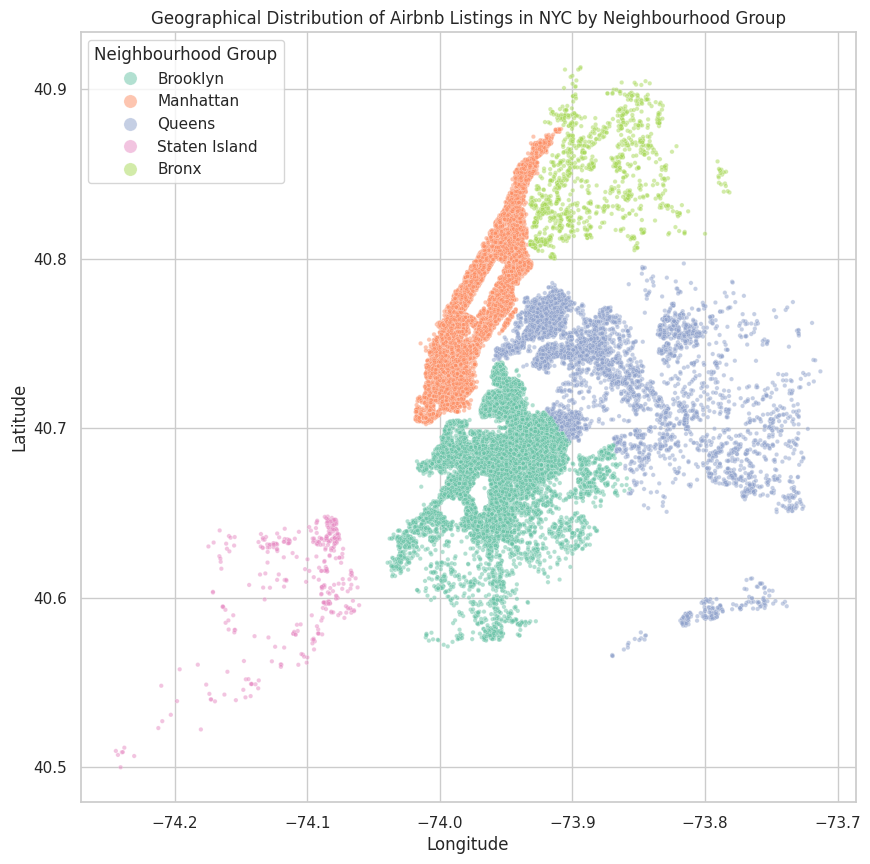

In [46]:
# Geospatial analysis - plot listings by latitude and longitude
plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=nyc_airbnb_df, palette="Set2", s=10, alpha=0.5)
plt.title("Geographical Distribution of Airbnb Listings in NYC by Neighbourhood Group")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Neighbourhood Group', markerscale=3, scatterpoints=1)
plt.show()

#### Price by Room Type (STEP 3)

Next, analyze the price distribution by room type to assess if certain types of accommodations are priced higher than others

The boxplot reveals that:
- Entire home/apartment listings have the highest median prices, with a wide range and more high-priced outliers.
- Private rooms are generally priced lower, with less variability than entire homes.
- Shared rooms have the lowest median prices and minimal variability.

This suggests that room type significantly impacts listing prices, with entire homes commanding the highest rates.


The scatter plot suggests that hosts with a larger number of listings generally set lower prices, with most high-priced listings concentrated among hosts with fewer listings. This could indicate that individual or small-scale hosts may price their properties higher, while larger hosts with multiple listings might offer competitive pricing.


MARIA NOTE: WE HAVENT' DONE CONFIDENCE INTERVALS AND HYPOTHESES TO SAY WHETHER SOMETHING IS STATISTICALLY SIGNIFICANT. CANNOT USE THE WORD SIGNIFICANT HERE. AGAIN OUTLIERS TOO. ALSO, WHAT SCATTERPLOT?

##### Price by Room Type (Zoomed In)

Midline of box shows median (not mean)
It is more robust to outliers, which makes it a better measure of central tendency than mean, which can be pulled higher.

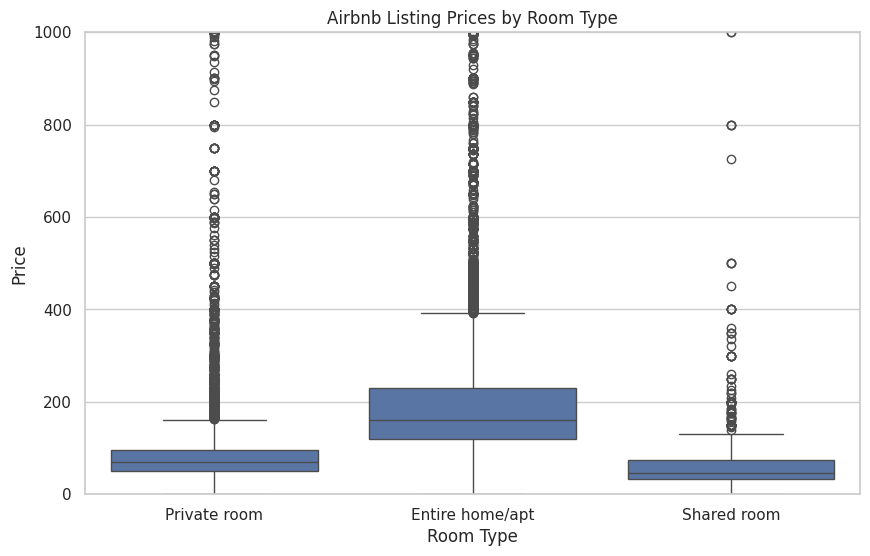

In [47]:
# Boxplot to show price distribution by room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=nyc_airbnb_df)
plt.ylim(0, 1000)  # Limit y-axis for a clearer view
plt.title("Airbnb Listing Prices by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price (USD)")
plt.show()

##### Price by host's calculated listings (STEP 4)



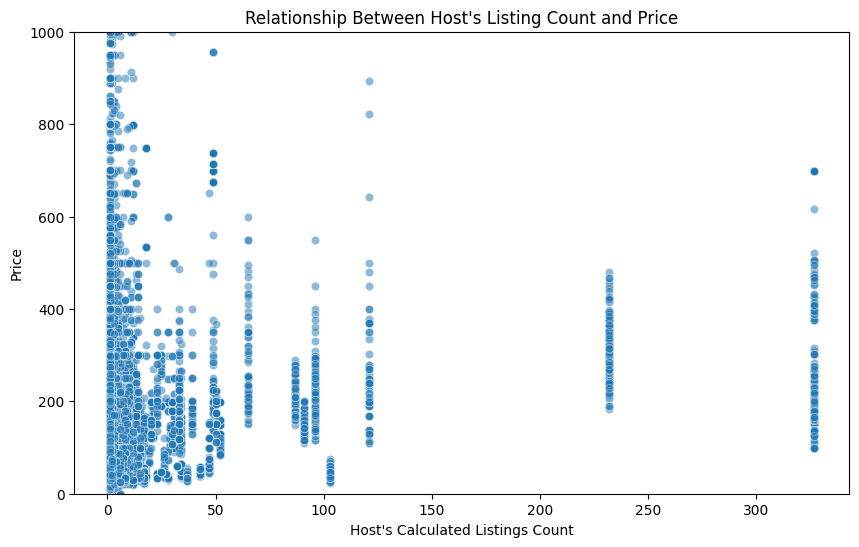

In [ ]:
# Step 4: Price vs Host's Calculated Listings Count

# Scatter plot to examine relationship between price and calculated host listings count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calculated_host_listings_count', y='price', data=nyc_airbnb_df, alpha=0.5)
plt.ylim(0, 1000)  # Limit y-axis for clearer view
plt.title("Relationship Between Host's Listing Count and Price")
plt.xlabel("Host's Calculated Listings Count")
plt.ylabel("Price")
plt.show()

##### Neighbourhood Group by Room Type by Price (STEP 5)

MARIA NOTE - Danty, I don't know where your code for this went. The code I generated isn't right.

Finally, examine the interaction between neighbourhood group and room type to see if combining these factors provides additional insights into pricing

The boxplot highlights the combined influence of neighbourhood group and room type on pricing:
- Entire homes/apartments in Manhattan are priced significantly higher compared to other room types and neighborhoods, followed by Brooklyn.
- Private rooms show moderate pricing across neighborhoods, with Manhattan and Brooklyn remaining on the higher end.
- Shared rooms are generally the most affordable across all neighborhoods, with prices varying less between locations.

This interaction analysis reinforces that both neighborhood and room type play substantial roles in determining listing prices.

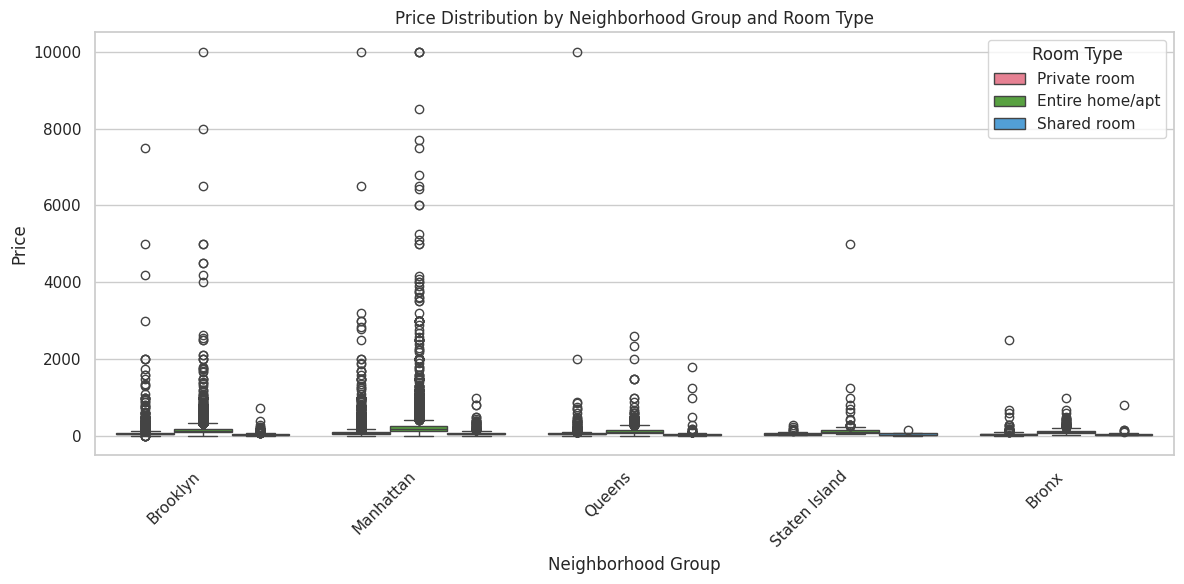

In [58]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.boxplot(x='neighbourhood_group', y='price', hue='room_type', data=nyc_airbnb_df, palette="husl")  # Changed palette to "husl"
plt.title('Price Distribution by Neighborhood Group and Room Type')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

### MULTIVARIATE ANALYSIS

Oluleye (2023) describes multivariate using multiple variable techniques:
- Kmeans cluster analysis
- Principle Component Analysis (PCA)
- Factor analysis

MARIA NOTE: WE HAVEN'T DONE THIS.


### **How can Airbnb NYC optimise revenues by providing tailored pricing recommendations based on understanding the influence of location, room type and host characteristics on price?**

EDA Steps

	1.	Analyze Price Distribution: Examine price to identify outliers and distribution shape.
	2.	Price by Neighbourhood Group: Analyze how prices vary by neighbourhood_group.
	3.	Price by Room Type: Examine price trends across different room types.
	4.	Price vs Host Characteristics:
	•	Calculated Host Listings Count: Investigate if hosts with multiple listings set different price levels.
	5.	Interactions:
	•	Neighbourhood Group & Room Type: Analyze combined influence on prices.
	6.	Regression Analysis: Conduct an initial regression to see how well these features explain price variability.


#### Kmeans Cluster Analysis

##### Deal with Outliers

MARIA NOTE: kMeans is sensitive to outliers.

Not sure what to do here.

##### Feature Selection and Scaling to Standardise

In [88]:
# Step 1: Handle Missing Values
# MARIA NOTE: THESE CONFLICT WITH THE CHANGES ABOVE. AND THESE ARE NOT USED?
# nyc_airbnb_df['last_review'] = pd.to_datetime(nyc_airbnb_df['last_review'], errors='coerce')
# nyc_airbnb_df['last_review'].fillna(pd.Timestamp('2019-01-01'), inplace=True)  # Replace with a default date MARIA NOTE- NOT SURE I LIKE THIS

# Step 2: Encode Categorical Features
encoder = LabelEncoder()
nyc_airbnb_df['room_type_encoded'] = encoder.fit_transform(nyc_airbnb_df['room_type'])
nyc_airbnb_df['neighbourhood_group_encoded'] = encoder.fit_transform(nyc_airbnb_df['neighbourhood_group'])

# Step 3: Feature Selection and Scaling
features = ['latitude', 'longitude', 'price', 'minimum_nights', 'availability_365',
           'reviews_per_month', 'room_type_encoded', 'neighbourhood_group_encoded']

X = nyc_airbnb_df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###### Elbow Method to determine optimal number of clusters (k)

Look for where decrease in inertia starts (4?)

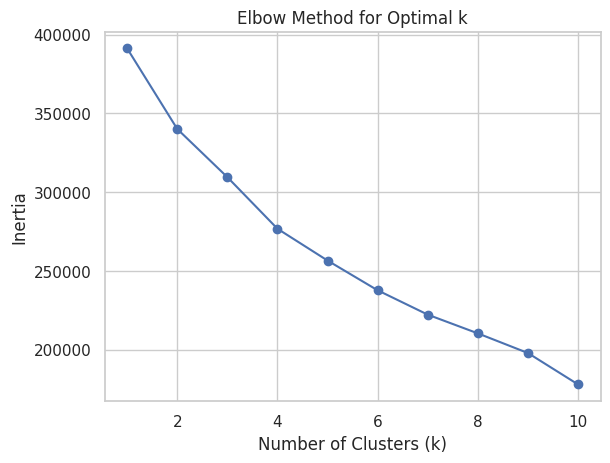

In [89]:
inertia_values = []
for i in range(1, 11):  # Try k values from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

###### Apply KMeans clustering adn assign cluster labels to data frame

Uses 4 from Elbow.

In [90]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
nyc_airbnb_df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

In [91]:
numeric_features = nyc_airbnb_df.select_dtypes(include=['number']).columns
nyc_airbnb_df.groupby('kmeans_cluster')[numeric_features].mean()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,kmeans_cluster_1,kmeans_cluster_2,kmeans_cluster_3,kmeans_cluster_4,kmeans_cluster_5,kmeans_cluster_6,kmeans_cluster_7,kmeans_cluster_8,kmeans_cluster_9,kmeans_cluster_10
kmeans_cluster,,,,,,,,,,,,,,,,,,,,,
0,1.875884e+07,6.652989e+07,40.753632,-73.978577,258.543600,11.687364,17.661163,0.853386,17.272380,119.277838,...,0.0,0.011463,1.052811,1.808270,1.822394,1.818846,1.933679,3.520674,3.503139,3.522721
1,1.932868e+07,7.456280e+07,40.779311,-73.958240,98.484693,4.685562,24.788268,1.121186,3.259431,106.543749,...,0.0,0.989631,1.112680,2.257357,2.281552,2.250543,4.949042,2.656725,2.643294,2.536342
2,1.827403e+07,5.686989e+07,40.686802,-73.950183,115.294901,5.334584,24.471901,1.067475,2.212230,98.693439,...,0.0,0.518641,1.480859,1.901016,2.904068,2.735425,2.719612,2.692989,2.688335,2.658159
3,2.276550e+07,1.064805e+08,40.721803,-73.853188,91.251574,4.453511,33.688862,1.972961,4.588136,173.184988,...,0.0,0.747942,0.987167,1.007506,1.012591,4.600969,4.642857,3.187167,3.185230,3.154237


##### Scatter plot by cluster

MARIA NOTE: BUT WHAT DOES THIS SAY?

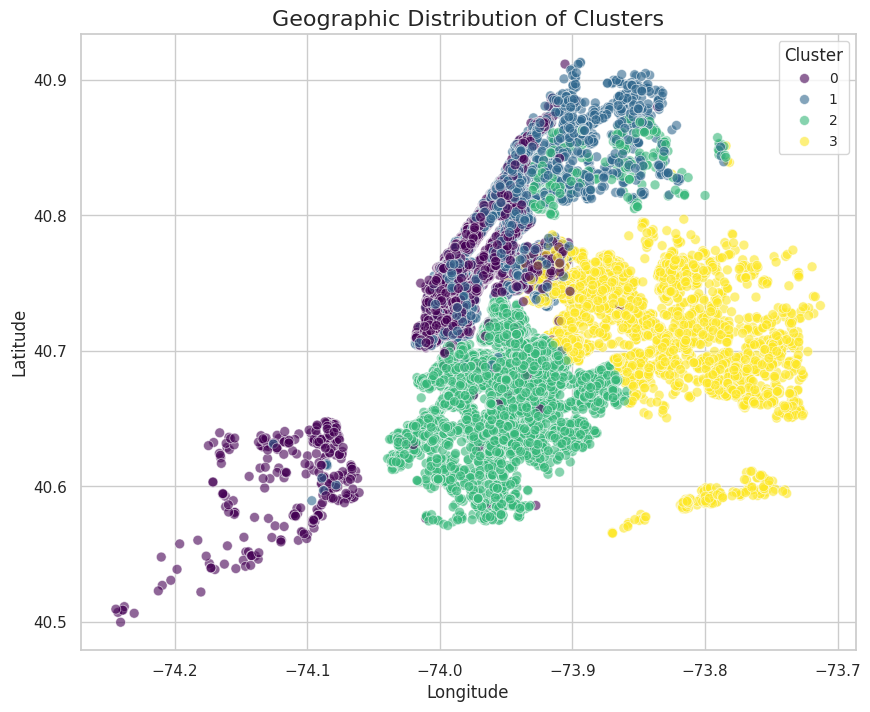

In [92]:
# Scatter plot of latitude vs. longitude colored by cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=nyc_airbnb_df['longitude'],
    y=nyc_airbnb_df['latitude'],
    hue=nyc_airbnb_df['kmeans_cluster'],
    palette='viridis',
    s=50,
    alpha=0.6
)
plt.title('Geographic Distribution of Clusters', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.show()

## CONCLUSION

Summary of Insights for Tailored Pricing Recommendations

- Location: Listings in Manhattan and Brooklyn command higher prices, particularly for entire homes or apartments.
- Room Type: Entire homes/apartments are priced the highest, while private and shared rooms are more affordable options.
- Host Characteristics: Hosts with multiple listings tend to set more competitive, lower prices, likely reflecting a business strategy of volume-based revenue.

With these insights, Airbnb could recommend pricing tiers based on a combination of location, room type, and host listing count, encouraging competitive pricing strategies aligned with the market trends.


## REFERENCES

Oluleye, A. (2023) *Exploratory Data Analysis with Python Cookbook*. Pockt Publishing.